<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220223_contours_minrectangle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


도형의 개수: 3(3)


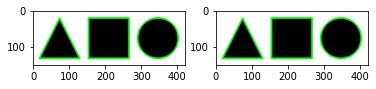

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/shapes.png')
img2 = img.copy()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, imthres = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV) # 배경/전경을 반전
# findContoures함수를 사용하려면 "검정 배경"에 "흰색 전경"으로 표현된 바이너리 이미지를 전달해야함

# 가장 바깥쪽 컨투어의 모든 좌표 반환
contour, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# 가장 바깥쪽 컨투어의 꼭지점 좌표만 반환
contour2, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# contour, contour2 각각 리스트 형태이며 리스트의 길이는 도형의 수와 같다
print('도형의 개수: {}({})'.format(len(contour), len(contour2)))

cv2.drawContours(img, contour, -1, (0,255,0), 4)
cv2.drawContours(img2, contour2, -1, (0,255,0), 4)
# 꼭지점 좌표를 연결해도 선처럼 나온다

imgs = {"img":img, "img2":img2}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,2,i+1)
    plt.imshow(v)

# 모든 컨투어와 hierarchy

도형의 개수 : 6
계층 구조
[[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 4  0  3 -1]
  [-1 -1 -1  2]
  [-1  2  5 -1]
  [-1 -1 -1  4]]]


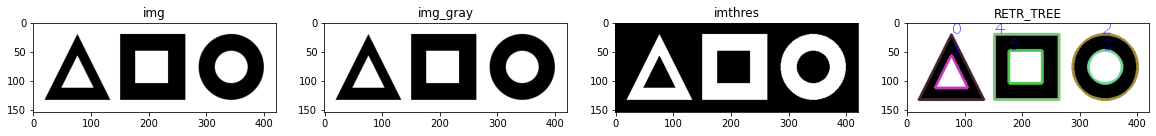

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/shapes_donut.png')
img2 = img.copy()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 
_, imthres = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
# 배경이 검정, 전경이 흰색으로 하는것이 좋다.

contours, hierarchy = cv2.findContours(imthres, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print('도형의 개수 :', len(contours))
print('계층 구조')
print(hierarchy)
for i, c in enumerate(contours):
    # 랜덤한 color 
    color = [int(i) for i in np.random.randint(0, 255, 3)]
    cv2.drawContours(img2, contours, i, color, 3) # i : 그림을 그릴 컨투어의 인덱스번호
    # 그릴컨투어(contours : 6개)의 i번째 컨투어
    cv2.putText(img2, str(i), tuple(c[0][0]), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255))

imgs = {"img":img, "img_gray":img_gray, "imthres":imthres, "RETR_TREE":img2}
plt.figure(figsize=(20, 10))
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1, len(imgs), i+1)
    plt.title(k)
    plt.imshow(v, cmap='gray')

In [26]:
np.random.randint(0,255,3) # 0부터 254까지, 3개를 배열로 : (3, )
[int(i) for i in np.random.randint(0,255, 3)] # 3개의 랜덤 값을 반복문으로 리스트에 담는다

[11, 165, 234]

In [51]:
for cont in contours: # contours 6개를 순회
    print(cont[0]) # 각 contour[0]의 좌표가 [[x y]] 형태

for cont in contours:
    print(cont[0][0]) # 각 contour[0][0] 좌표가 [x y] 형태

for cont in contours:    
    print(tuple(cont[0][0])) # 각 contour[0][0]의 좌표가 (x, y) 형태 : 좌표로 사용가능

[[76 20]]
[[75 57]]
[[336  19]]
[[337  48]]
[[151  19]]
[[176  48]]
[76 20]
[75 57]
[336  19]
[337  48]
[151  19]
[176  48]
(76, 20)
(75, 57)
(336, 19)
(337, 48)
(151, 19)
(176, 48)


# hierarchy 계층구조
> columns = 다음, 이전, 자식, 부모

> 부모 인덱스가 -1 이면 없다는 의미 = 최외곽 컨투어 

In [67]:
hierarchy[0]

array([[ 2, -1,  1, -1],
       [-1, -1, -1,  0],
       [ 4,  0,  3, -1],
       [-1, -1, -1,  2],
       [-1,  2,  5, -1],
       [-1, -1, -1,  4]], dtype=int32)

In [71]:
import pandas as pd
df = pd.DataFrame(hierarchy[0], columns=['다음','이전','자식','부모'])
df

,다음,이전,자식,부모
0,2,-1,1,-1
1,-1,-1,-1,0
2,4,0,3,-1
3,-1,-1,-1,2
4,-1,2,5,-1
5,-1,-1,-1,4


# 컨투어를 감싸는 도형

(4, 2)


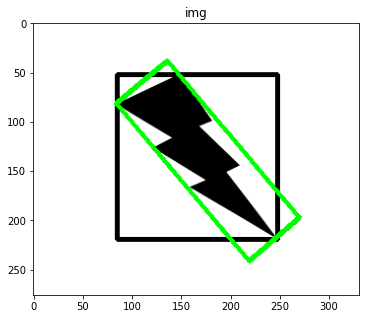

In [118]:
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lightning.png')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, imthres = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(imthres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # 컨투어의 꼭지점 좌표필요

contour = contours[0] # findContours()로 반환된 contours는 [[[x y], [x, y], ...,[x, y]]] 좌표로 활용하기 위해서는 contours[0] 
# drawContour()함수로 사용되는 파라미터 contour는 그대로 써주면 되지만, 좌표를 얻을때는 contours[0] 주의

# 감싸는 사각형
x, y, w, h = cv2.boundingRect(contour) # 좌표를 얻기위해 사용되는 contour
cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,0), 3)

# 최소한의 사각형
rect = cv2.minAreaRect(contour) # (중심점의 x좌표, 중심점의 y좌표, 각도)
box = cv2.boxPoints(rect) # 4개의 꼭지점 좌표로 변환 : (4,2) shape의 배열
box = np.int0(box) # 정수로 변환
cv2.drawContours(img, [box], -1, (0,255,0), 3) # [0]이용하여 좌표로 변환된 contour를, 다시 [] 리스트를 씌워줌

imgs = {"img":img}
plt.figure(figsize=(10, 5))
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1, len(imgs), i+1)
    plt.title(k)
    plt.imshow(v, cmap='gray')

In [105]:
# len(contours[0])
contours # 리스트 형태, 값 1개 : [[[x1, y2], [], [], ...,[x332, y332]]]
contours[0] # 리스트 형태, 값 332개 [[x1, y2], [], [], ...,[x332, y332]] 

332

In [117]:
rect = cv2.minAreaRect(contour) # (중심점의 x좌표, 중심점의 y좌표, 각도)
box = cv2.boxPoints(rect)
box

array([[219.09561 , 241.46503 ],
       [ 84.92163 ,  81.90679 ],
       [136.7897  ,  38.290466],
       [270.96368 , 197.8487  ]], dtype=float32)